0.7241379310344827


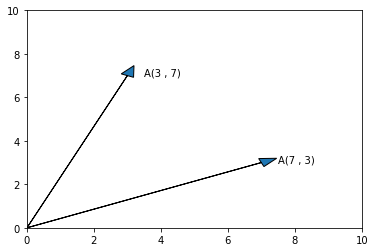

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([7,3])
B = np.array([3,7])

ax = plt.axes()
ax.arrow(0,0, A[0], A[1], head_width = 0.4 , head_length = 0.5)
plt.annotate(f"A({A[0]} , {A[1]})" , xy=(A[0]+0.5 , A[1]))

ax.arrow(0,0, B[0], B[1], head_width = 0.4 , head_length = 0.5)
plt.annotate(f"A({B[0]} , {B[1]})" , xy=(B[0]+0.5 , B[1]))
plt.xlim(0,10)
plt.ylim(0,10)


# cosine similarity between the two points

cos_sim = np.dot(A,B) / (np.linalg.norm(A) * np.linalg.norm(B))
print(cos_sim)

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
A = np.array([3,2,0,5])
B = np.array([1,0,0,0])

cos_sim = cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))

In [3]:
cos_sim

array([[0.48666426]])

In [4]:
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

doc_zee = "Zeeshan is a Mechanical engineer and also he is intrested in politics"

documents = [doc_trump, doc_election, doc_putin, doc_zee]

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

bow = TfidfVectorizer(stop_words='english')
sparse_mat = bow.fit_transform(documents)

In [6]:
bow.get_feature_names()

['career',
 'claimed',
 'earlier',
 'election',
 'elections',
 'engineer',
 'friend',
 'friends',
 'interference',
 'intrested',
 'lost',
 'mechanical',
 'minister',
 'mr',
 'outcome',
 'parties',
 'political',
 'politics',
 'post',
 'president',
 'prime',
 'putin',
 'republican',
 'russia',
 'says',
 'served',
 'support',
 'trump',
 'vladimir',
 'winning',
 'witchhunt',
 'zeeshan']

In [7]:
df = pd.DataFrame(sparse_mat.toarray() , columns = bow.get_feature_names() , 
                  index = ['doc_trump','doc_election','doc_putin','doc_zee'])

In [8]:
df

,career,claimed,earlier,election,elections,engineer,friend,friends,interference,intrested,...,republican,russia,says,served,support,trump,vladimir,winning,witchhunt,zeeshan
doc_trump,0.000000,0.000000,0.000000,0.206674,0.000000,0.000000,0.000000,0.524279,0.000000,0.000000,...,0.262139,0.000000,0.000000,0.000000,0.262139,0.413347,0.000000,0.262139,0.000000,0.000000
doc_election,0.000000,0.235723,0.000000,0.371693,0.000000,0.000000,0.235723,0.000000,0.235723,0.000000,...,0.000000,0.000000,0.471445,0.000000,0.000000,0.185846,0.000000,0.000000,0.235723,0.000000
doc_putin,0.280975,0.000000,0.280975,0.000000,0.280975,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.280975,0.000000,0.280975,0.000000,0.000000,0.280975,0.000000,0.000000,0.000000
doc_zee,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.447214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214


In [9]:
cosine_similarity(df,df)

array([[1.        , 0.35503653, 0.21005392, 0.        ],
       [0.35503653, 1.        , 0.26983715, 0.        ],
       [0.21005392, 0.26983715, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])